## This notebook relates to ticket https://noirlab.atlassian.net/browse/GOATS-552

In [1]:
## folowing imports copied from https://github.com/TOMToolkit/tom_base/blob/dev/tom_dataproducts/processors/spectroscopy_processor.py 
import mimetypes
import numpy as np

from datetime import datetime

from astropy import units
from astropy.io import fits, ascii as astropy_ascii
from astropy.time import Time
from astropy.wcs import WCS
from specutils import Spectrum1D

# from tom_dataproducts.data_processor import DataProcessor
# from tom_dataproducts.exceptions import InvalidFileFormatException
# from tom_dataproducts.processors.data_serializers import SpectrumSerializer
#from tom_observations.facility import get_service_class, get_service_classes

In [2]:
# import other libraries
import astrodata
import gemini_instruments
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

### Open the different types of fits files for spectra for plotting

In [3]:
ls /Users/monika.soraisam/Desktop/tomdev/real_goats/reference_files_goats_testing

S20210219S0076_1D.fits
S20210219S0084_standard.fits
S20240512S0136_blue001_dragons.fits
S20240512S0136_red001_dragons.fits
ZTF21abdvbmm.txt
ZTF21abdvbmm.txt~
blah.txt
cbluedcosmic_ZTF18abilbrr_kast_blue_2019-08-08T_ex.fits
creddcosmic_ZTF18abilbrr_kast_red_2019-08-08T_ex.fits
spectrum_sample.csv


In [21]:
hdul = fits.open(ref_path+"S20210219S0076_1D.fits")
print (hdul[0].header['DATE-OBS'])
print (hdul[0].header['TIME-OBS'])
hdul.close()

2021-02-19
08:29:40.2


In [70]:
hdul = fits.open(ref_path+"S20240512S0136_red001_dragons.fits")
print (hdul[0].header['DATE-OBS'])
print (hdul[0].header['TIME-OBS'])
hdul.close()

2024-05-12


KeyError: "Keyword 'TIME-OBS' not found."

In [ ]:
def plot_spec(spec1d):
    fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux)
ax.set_xlabel(f'{spectrum.spectral_axis.unit}')

ax.set_ylabel(f'{spectrum.flux.unit}')
plt.show()

Number of pixel extensions/extracted apertures for S20210219S0076_1D.fits: 1
Extension is 0, flux unit is W / (nm m2), spectral axis unit is nm


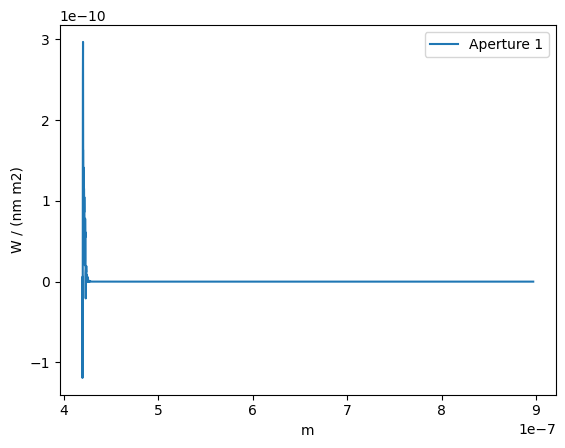

Number of pixel extensions/extracted apertures for S20210219S0084_standard.fits: 1
Extension is 0, flux unit is electron, spectral axis unit is nm


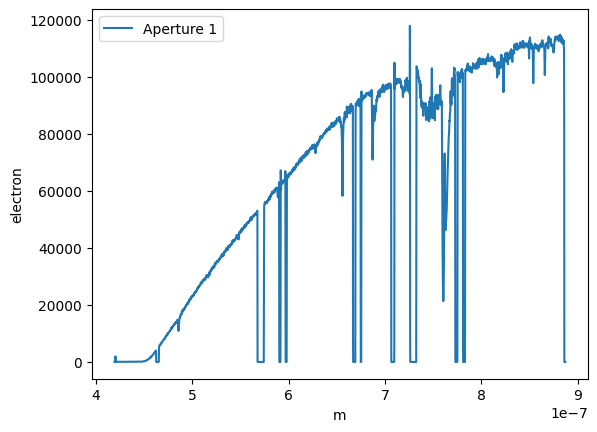

Number of pixel extensions/extracted apertures for S20240512S0136_blue001_dragons.fits: 2
Extension is 0, flux unit is electron, spectral axis unit is nm
Extension is 1, flux unit is electron, spectral axis unit is nm


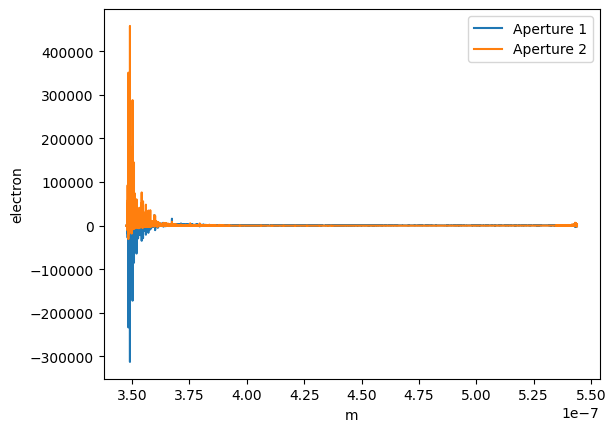

Number of pixel extensions/extracted apertures for S20240512S0136_red001_dragons.fits: 2
Extension is 0, flux unit is electron, spectral axis unit is nm
Extension is 1, flux unit is electron, spectral axis unit is nm


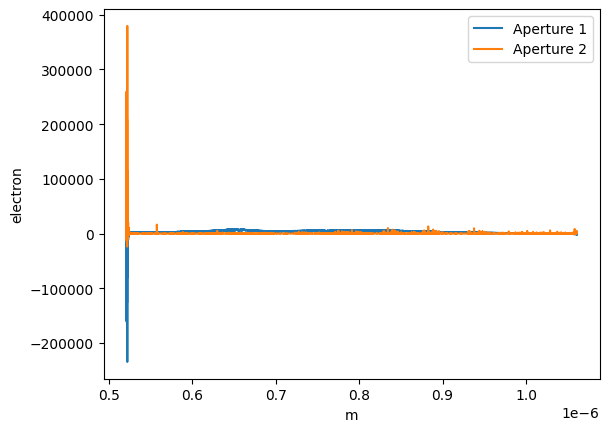

Number of pixel extensions/extracted apertures for cbluedcosmic_ZTF18abilbrr_kast_blue_2019-08-08T_ex.fits: 1
Extension is 0, flux unit is erg / (Angstrom s cm2), spectral axis unit is deg


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


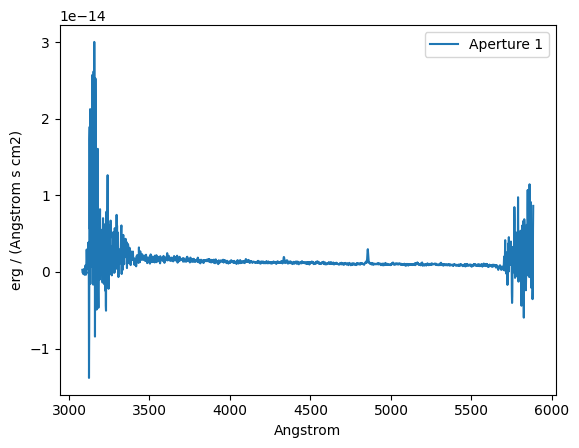

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Number of pixel extensions/extracted apertures for creddcosmic_ZTF18abilbrr_kast_red_2019-08-08T_ex.fits: 1
Extension is 0, flux unit is erg / (Angstrom s cm2), spectral axis unit is deg


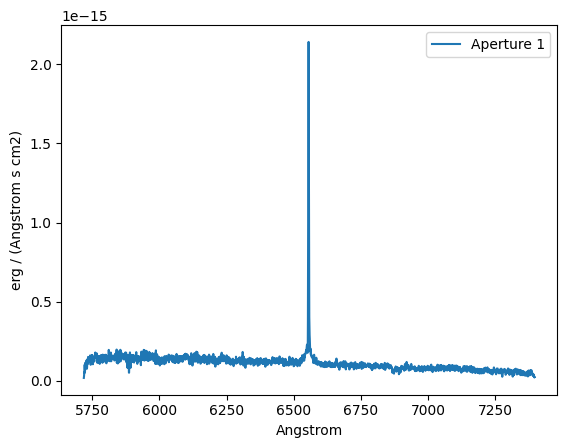

In [144]:
DEFAULT_WAVELENGTH_UNITS = u.angstrom
DEFAULT_FLUX_CONSTANT = u.erg / u.cm ** 2 / u.second / u.angstrom

plt.close('all')

for i, FF in enumerate(["S20210219S0076_1D.fits", "S20210219S0084_standard.fits", "S20240512S0136_blue001_dragons.fits", 
           "S20240512S0136_red001_dragons.fits", "cbluedcosmic_ZTF18abilbrr_kast_blue_2019-08-08T_ex.fits",
           "creddcosmic_ZTF18abilbrr_kast_red_2019-08-08T_ex.fits"]):
    # if i < 4:
    #     continue
        
    ad = astrodata.open(ref_path+FF)
    print (f"Number of pixel extensions/extracted apertures for {FF}: {len(ad.indices)}")

    fig, ax = plt.subplots()
    
    ## loop over the extensions and create spectrum object that can be used for plotting
    for idx in ad.indices:
        header = ad[idx].hdr
        flux = ad[idx].data
        flux_unit = header.get("BUNIT")
        if flux_unit is not None:
            flux_unit = u.Unit(flux_unit)
        else:
            flux_unit = DEFAULT_FLUX_CONSTANT
        print (f"Extension is {idx}, flux unit is {flux_unit}, spectral axis unit is {header['CUNIT1']}")

        # to take care of Iraf generated multispec (ms) fits files
        dim = len(flux.shape)
        if dim == 3:
            flux = flux[0, 0, :]
        elif flux.shape[0] == 2:
            flux = flux[0, :]
        if header['CUNIT1'] == "deg":
            header['CUNIT1'] = 'Angstrom'
        
        wcs = WCS(header=header, naxis=1)
        spectrum = Spectrum1D(flux=flux * flux_unit, wcs=wcs)
        
        # print (spectrum.spectral_axis) # wavelength with unit  
        # print (spectrum.spectral_axis.value) # wavelength without unit
        # print (spectrum.flux) # flux with unit 
        # print (spectrum.flux.value) # flux without unit        

        ax.plot(spectrum.spectral_axis, spectrum.flux, label=f"Aperture {idx+1}")
        
    ax.set_xlabel(f'{spectrum.spectral_axis.unit}')
    ax.set_ylabel(f'{spectrum.flux.unit}')
    plt.legend()
    plt.show()

    #break

## For IRAF generated multispec fits files

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
  'angstroms' -> 'Angstrom'. [astropy.wcs.wcs]


Number of pixel extensions/extracted apertures for creddcosmic_ZTF18abilbrr_kast_red_2019-08-08T_ex.fits: 1
Extension is 0, flux unit is erg / (Angstrom s cm2), spectral axis unit is deg


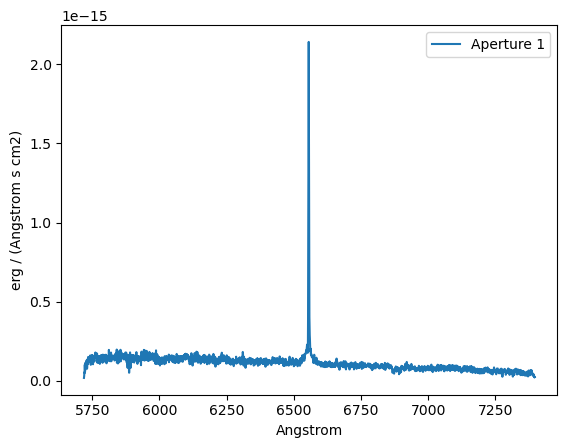

In [7]:
DEFAULT_WAVELENGTH_UNITS = u.angstrom
DEFAULT_FLUX_CONSTANT = u.erg / u.cm ** 2 / u.second / u.angstrom

plt.close('all')

for i, FF in enumerate(["creddcosmic_ZTF18abilbrr_kast_red_2019-08-08T_ex.fits"]):
    ad = astrodata.open("/Users/monika.soraisam/Desktop/tomdev/real_goats/reference_files_goats_testing/"+FF)
    print (f"Number of pixel extensions/extracted apertures for {FF}: {len(ad.indices)}")

    fig, ax = plt.subplots()
    
    ## loop over the extensions and create spectrum object that can be used for plotting
    for idx in ad.indices:
        header = ad[idx].hdr
        flux = ad[idx].data
        flux_unit = header.get("BUNIT")
        if flux_unit is not None:
            flux_unit = u.Unit(flux_unit)
        else:
            flux_unit = DEFAULT_FLUX_CONSTANT
        print (f"Extension is {idx}, flux unit is {flux_unit}, spectral axis unit is {header['CUNIT1']}")

        # to take care of Iraf generated multispec (ms) fits files
        dim = len(flux.shape)
        if dim == 3:
            flux = flux[0, 0, :]
        elif flux.shape[0] == 2:
            flux = flux[0, :]
        if header['CUNIT1'] == "deg":
            # Loop through header keywords
            for key, value in header.items():
                if "WAT" in key and value is not None:
                    if "label=Wavelength units=" in value:
                        header['CUNIT1'] = value.split("units=")[-1].strip()
                        break
        # if header['CUNIT1'] == "deg":
        #     header['CUNIT1'] = 'Angstrom'
        
        wcs = WCS(header=header, naxis=1)
        spectrum = Spectrum1D(flux=flux * flux_unit, wcs=wcs)
        
        # print (spectrum.spectral_axis) # wavelength with unit  
        # print (spectrum.spectral_axis.value) # wavelength without unit
        # print (spectrum.flux) # flux with unit 
        # print (spectrum.flux.value) # flux without unit        

        ax.plot(spectrum.spectral_axis, spectrum.flux, label=f"Aperture {idx+1}")
        
    ax.set_xlabel(f'{spectrum.spectral_axis.unit}')
    ax.set_ylabel(f'{spectrum.flux.unit}')
    plt.legend()
    plt.show()

    #break